# 데이터 불러오기

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
# Data Load 
import pandas as pd
data = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/train.csv')


data_test = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/test.csv')




id : 샘플 아이디

Store : 쇼핑몰 지점

Date : 주 단위(Weekly) 날짜

Temperature : 해당 쇼핑몰 주변 기온

Fuel_Price : 해당 쇼핑몰 주변 연료 가격

Promotion 1~5 : 해당 쇼핑몰의 비식별화된 프로모션 정보(세일, 이벤트, 프로모션 의미를 가진 feature의 정보 값으로써 활용)

Unemployment : 해당 쇼핑몰 지역의 실업률

IsHoliday : 해당 기간의 공휴일 포함 여부

Weekly_Sales : 주간 매출액 (목표 예측값)


In [ ]:
train_df[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].describe()

,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5
count,2102.00000,1592.00000,1885.00000,1819.00000,2115.00000
mean,7155.93066,3308.12581,1462.53552,3465.95250,4518.99317
std,8408.20608,9382.82380,9667.58026,6413.11629,6048.66191
min,0.27000,-265.76000,-29.10000,0.41000,135.16000
25%,1844.29500,39.75500,4.70000,499.89500,1742.30500
50%,5221.14000,205.41000,24.60000,1532.63000,3226.41000
75%,9199.24250,1931.00500,104.01000,3640.90500,5444.03000
max,88646.76000,104519.54000,141630.61000,67474.85000,108519.28000


In [ ]:
train_df[['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']].median()

Promotion1   5221.14000
Promotion2    205.41000
Promotion3     24.60000
Promotion4   1532.63000
Promotion5   3226.41000
dtype: float64

# EDA

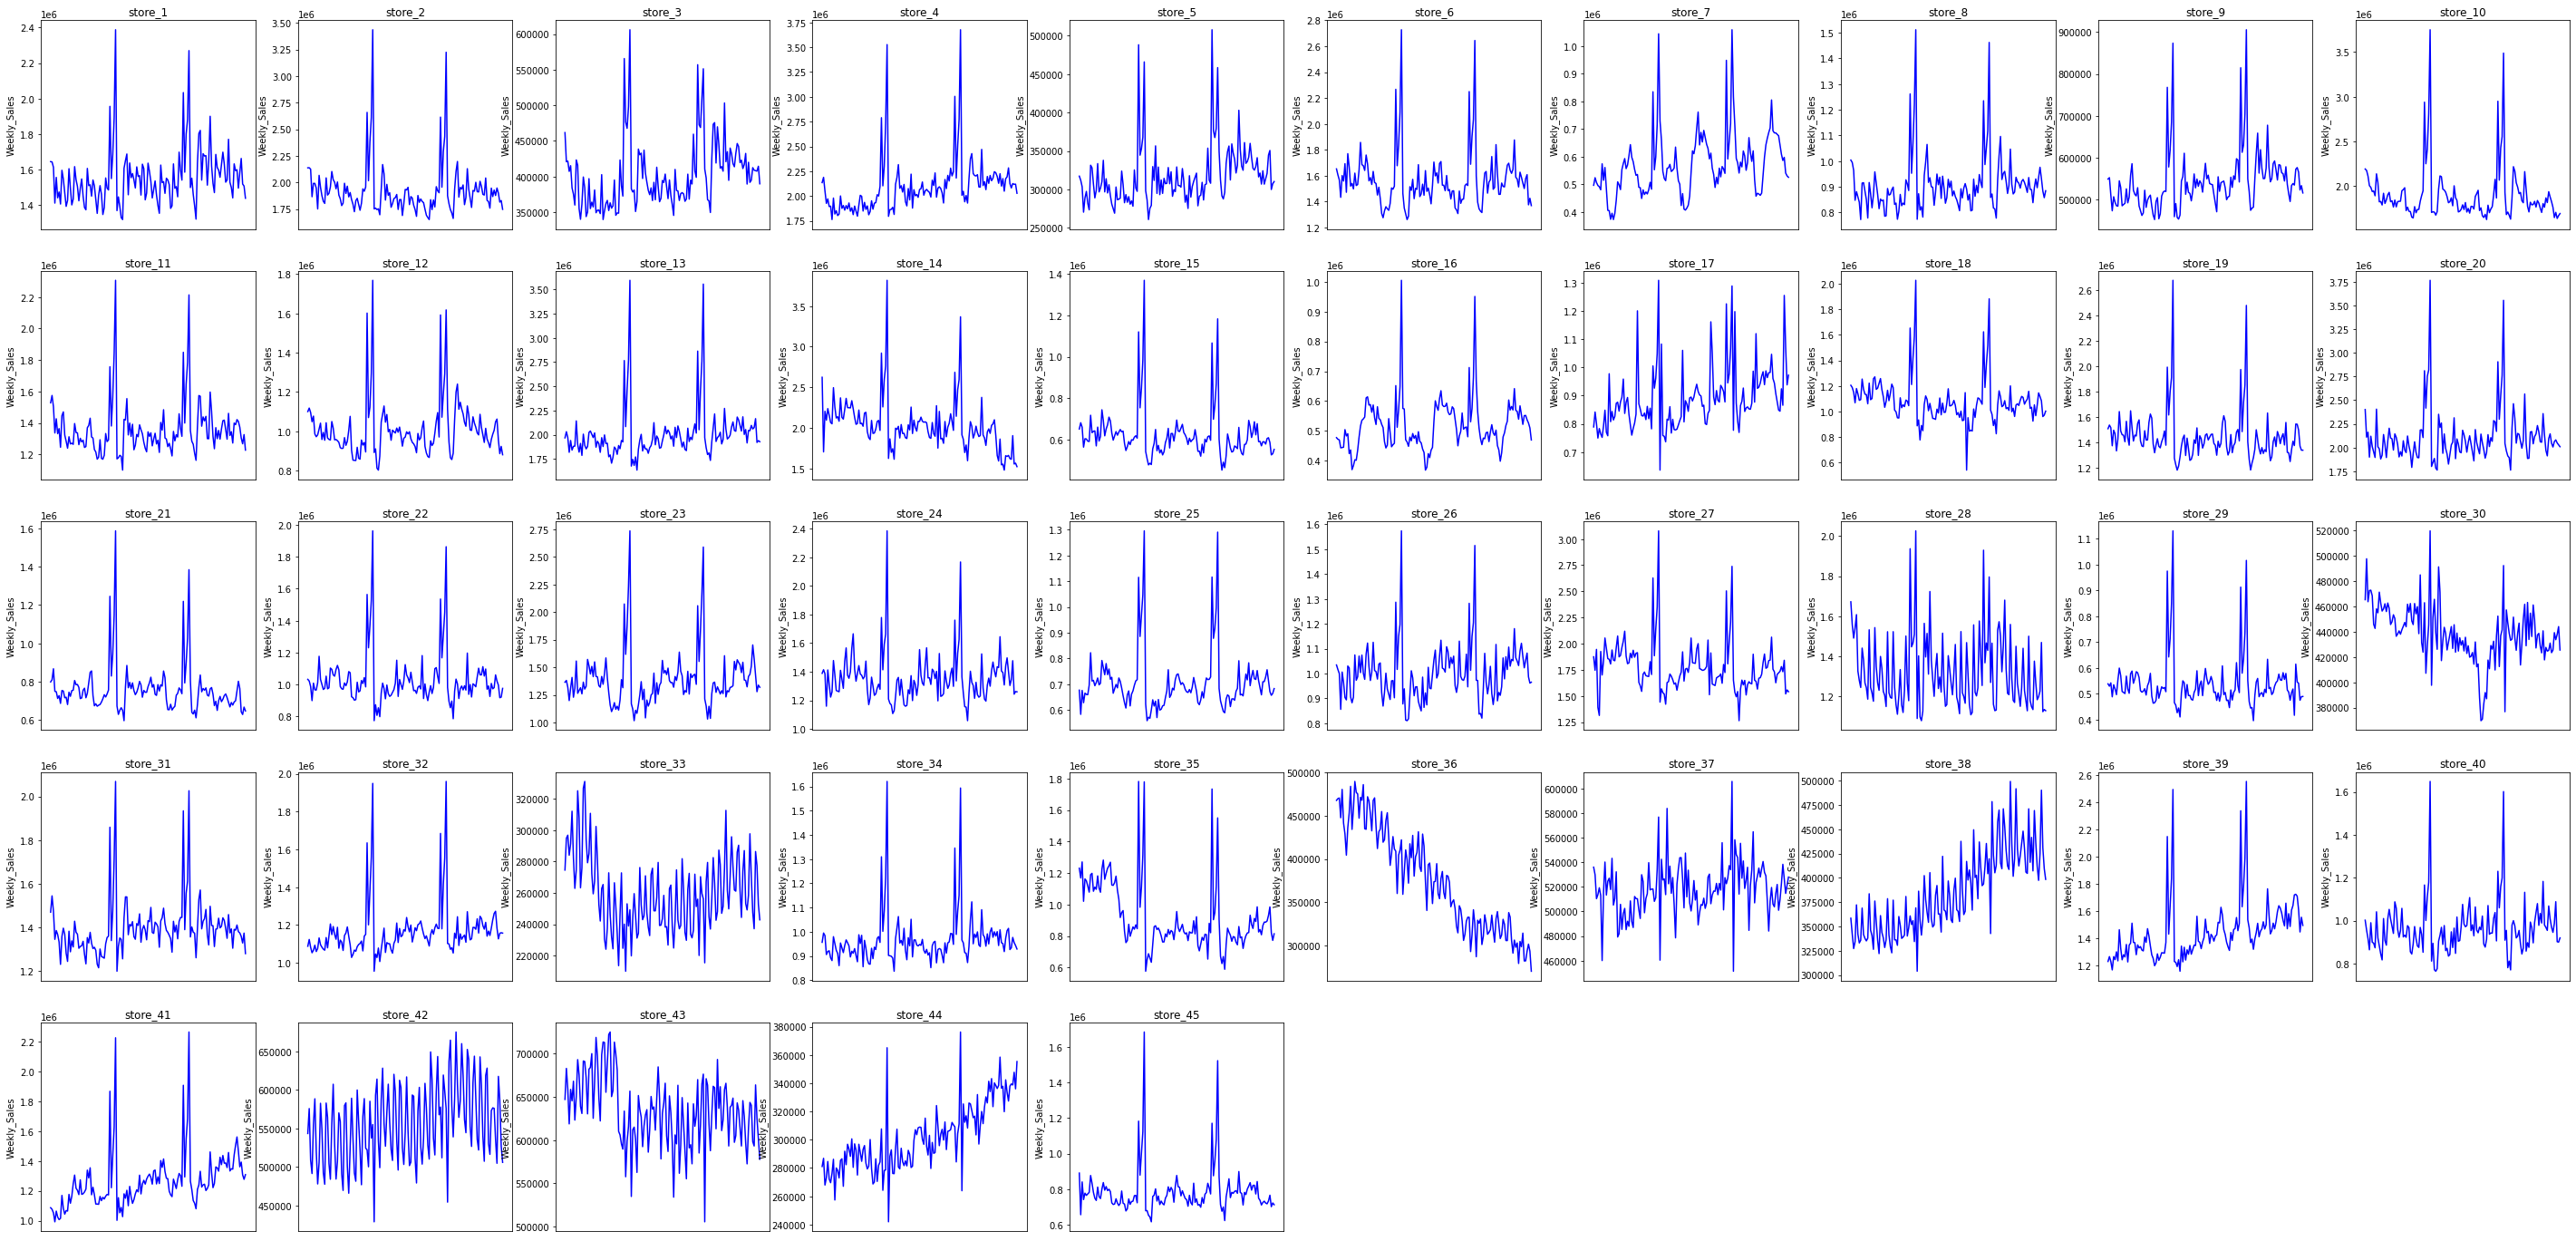

In [65]:
from matplotlib import dates

fig = plt.figure(figsize=(50,50)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정

for i in range(1,46):
    train2 = data[data.Store == i]

    train2  = train2[["Date", "Weekly_Sales"]]
    
    ax = fig.add_subplot(10,10,i) ## 그림 뼈대(프레임) 생성


    plt.title("store_{}".format(i)) 
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=15)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval = 2))
    ax.plot(train2["Date"], train2["Weekly_Sales"],marker='',label='train', color="blue")

plt.show()

In [66]:
data['Promotion1'][data['Promotion1'] < 0] = 0
data['Promotion2'][data['Promotion2'] < 0] = 0
data['Promotion3'][data['Promotion3'] < 0] = 0
data['Promotion4'][data['Promotion4'] < 0] = 0
data['Promotion5'][data['Promotion5'] < 0] = 0

data_test['Promotion1'][data_test['Promotion1'] < 0] = 0
data_test['Promotion2'][data_test['Promotion2'] < 0] = 0
data_test['Promotion3'][data_test['Promotion3'] < 0] = 0
data_test['Promotion4'][data_test['Promotion4'] < 0] = 0
data_test['Promotion5'][data_test['Promotion5'] < 0] = 0

# Fill 0 on missing value
data.fillna(0, inplace=True)
data_test.fillna(0, inplace = True)

In [67]:
# 일/월/년도 식의 format은 보기 분편해서 임의로 편하게 바꿔주었다.
date_df = data.loc[:, ['Date']]


for i in range(len(date_df)) :
    date_list =  date_df.loc[i].str.split('/')
    date_df.loc[i] = date_list[0][2] + '-' + date_list[0][1] + '-' + date_list[0][0]

data['Date'] = date_df

# Change type of 'Date' : object to datedime
data['Date'] = pd.to_datetime(data["Date"])
data['week'] =data['Date'].dt.week
data['month'] =data['Date'].dt.month 
data['year'] =data['Date'].dt.year
data['WeekOfYear'] = (data.Date.dt.isocalendar().week)*1.0 
data['day'] = data['Date'].dt.day

date_df = data_test.loc[:, ['Date']]
for i in range(len(date_df)) :
    date_list =  date_df.loc[i].str.split('/')
    date_df.loc[i] = date_list[0][2] + '-' + date_list[0][1] + '-' + date_list[0][0]

data_test['Date'] = date_df

# Change type of 'Date' : object to datedime
data_test['Date'] = pd.to_datetime(data_test["Date"])
data_test['week'] =data_test['Date'].dt.week
data_test['month'] =data_test['Date'].dt.month 
data_test['year'] =data_test['Date'].dt.year
data_test['WeekOfYear'] = (data_test.Date.dt.isocalendar().week)*1.0 
data_test['day'] = data_test['Date'].dt.day

In [ ]:
x=np.linspace(1,len(array),len(array))
plt.plot(x,array)
plt.show()

In [70]:
fig = plt.figure(figsize=(30,60))
train_df = data
for store in range(1,46):
    storeset = train_df[train_df.Store==store]
    storeset_2010 = storeset[(storeset.year==2010) & (storeset.WeekOfYear<=43)]
    #storeset_2010 = np.linspace(1,len(storeset_2010),len(storeset_2010))

    storeset_2011 = storeset[(storeset.year==2011) & (storeset.WeekOfYear<=43)]
    #storeset_2011 = np.linspace(1,len(storeset_2011),len(storeset_2011))

    storeset_2012 = storeset[(storeset.year==2012) & (storeset.WeekOfYear<=43)]
    #storeset_2012 = np.linspace(1,len(storeset_2012),len(storeset_2012))
    '''
    ax = fig.add_subplot(12, 4, store)
    
    plt.title(f"store_{store}")
    ax.plot(storeset_2010.WeekOfYear, storeset_2010.Weekly_Sales, label="2010", alpha=0.3)
    ax.plot(storeset_2011.WeekOfYear, storeset_2011.Weekly_Sales, label="2011", alpha=0.3)
    ax.plot(storeset_2012.WeekOfYear, storeset_2012.Weekly_Sales, label="2012", color='r')
    #ax.plot(test_pred_store.WeekOfYear, test_pred_store.Before_Weekly_Sales, label="2012-pred", color='b')
    ax.legend()
    
plt.show()
'''

<Figure size 2160x4320 with 0 Axes>

In [72]:
pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 4.3 MB/s 


In [73]:
from tslearn.clustering import TimeSeriesKMeans

scaled_time_series_df = pd.DataFrame()
for num in range(1, 46) :
    col_name = "Store " +str(num)
    scaler = MinMaxScaler()
    # test 셋은 2012년 10월 데이터이기 때문에 각 연도별 10월(포함) 이전의 시계열 데이터의 유사성을 판단하여 type을 나누었습니다.
    time_series = data[(data.Store==num) & (data.month <= 10)]['Weekly_Sales'].values.reshape(-1, 1)
    scaled_time_series = scaler.fit_transform(time_series) 
    scaled_time_series = pd.DataFrame(scaled_time_series)
    scaled_time_series_df[col_name] = scaled_time_series

transpose_scaled_time_series_df = scaled_time_series_df.transpose()
    
km = TimeSeriesKMeans(n_clusters=3, 
                      metric="dtw", 
                      max_iter=5,
                      random_state=2022)

prediction = km.fit_predict(transpose_scaled_time_series_df)

list_0 = []
list_1 = []
list_2 = []

for i in range(len(prediction)) :
    if prediction[i] == 0 :
        list_0.append(i+1)
    elif prediction[i] == 1 :
        list_1.append(i+1)
    else:
        list_2.append(i+1)

print("Clustering 0 : ", list_0)
print("Clustering 1 : ", list_1)
print("Clustering 2 : ", list_2)

for i in range(len(prediction)) :
    if prediction[i] == 0 :
        data.loc[(data.Store == i + 1), 'Type'] = 0
        data_test.loc[(data_test.Store == i + 1), 'Type'] = 0
    elif prediction[i] == 1 :
        data.loc[(data.Store == i + 1), 'Type'] = 1
        data_test.loc[(data_test.Store == i + 1), 'Type'] = 1
    else:
        data.loc[(data.Store == i + 1), 'Type'] = 2
        data_test.loc[(data_test.Store == i + 1), 'Type'] = 2

Clustering 0 :  [6, 13, 15, 19, 21, 22, 23, 24, 25, 26, 27, 29, 32, 37, 40, 43, 45]
Clustering 1 :  [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 16, 17, 20, 28, 31, 33, 34, 38, 39, 41, 42, 44]
Clustering 2 :  [14, 18, 30, 35, 36]


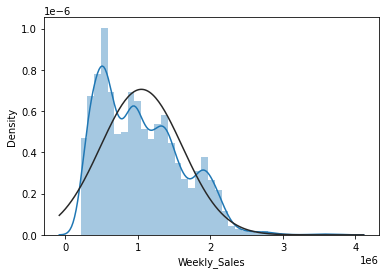

In [75]:
from scipy import stats

sns.distplot(data['Weekly_Sales'], fit=stats.norm)


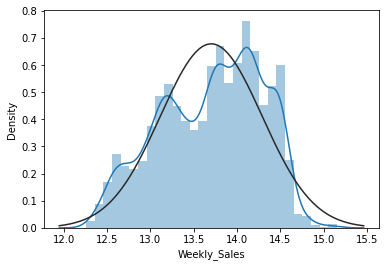

In [76]:

sns.distplot(np.log1p(data['Weekly_Sales']), fit=stats.norm)

In [77]:
data.to_csv("train_set.csv", index = False)
data_test.to_csv("test_set.csv", index = False)
data["Weekly_Sales"] = np.log1p(data["Weekly_Sales"]) 

In [78]:
data = data.drop([ 'id', 'Date', 'WeekOfYear'], axis = 1)
data_test = data_test.drop(['id', 'Date', 'WeekOfYear'], axis = 1)

temp = data["Weekly_Sales"]
scaler = MinMaxScaler()

scaler.fit(data)
data_scaled = scaler.transform(data)
real_data = pd.DataFrame(data=data_scaled, columns= data.columns)

data = data.drop("Weekly_Sales", axis = 1)
from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()
scaler2.fit(data)
data_scaled = scaler2.transform(data)

data_test_scaled = scaler2.transform(data_test)
data_test = pd.DataFrame(data=data_test_scaled, columns= data_test.columns)
real_data["Original_Weekly_Sales"] = temp

# Save subset
real_data.to_csv("minmax_train_set.csv", index = False)
data_test.to_csv("minmax_test_set.csv", index = False)

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics, ensemble, linear_model
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

train_df = pd.read_csv('minmax_train_set.csv')
test_df = pd.read_csv('minmax_test_set.csv')

# 스케일러를 위한 Original train set 불러오기
original_train_df = pd.read_csv('train_set.csv')
original_test_df = pd.read_csv('test_set.csv')

scaler_for_weekly_sales = MinMaxScaler()
scaler_for_weekly_sales.fit(train_df['Original_Weekly_Sales'].values.reshape(-1, 1))

# X_train
X_train = train_df[train_df.month <= 0.85]
y_train = X_train.Weekly_Sales

# 앞의분 분석에서 중요하다고 생각했던 feature들을 따로 모았습니다. 
feature = ['Store', 'Type', 'year', 'week','IsHoliday', 'month', 'day']

In [84]:
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate':[0.1], #so called `eta` value
              'max_depth': [50],
              'min_child_weight': [4],
              'subsample': [0.8],
              'colsample_bytree': [0.8],
              'n_estimators':[30000]
              } 

xgb = XGBRegressor(random_state = 2022)

xgb_grid = GridSearchCV(xgb,
                        parameters,
                        cv = 10,
                        scoring = 'neg_root_mean_squared_error',
                        n_jobs = 5,
                        verbose=3
                        )

xgb_grid.fit(X_train[feature], y_train)
best_model = xgb_grid.best_estimator_
print("BEST SCORE : {}".format(xgb_grid.best_score_))
print("BEST PARAMETER : {}".format(xgb_grid.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
BEST SCORE : -0.24840602951625876
BEST PARAMETER : {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 50, 'min_child_weight': 4, 'n_estimators': 30000, 'objective': 'reg:squarederror', 'subsample': 0.8}


In [81]:
prediction = best_model.predict(test_df[feature])
prediction = scaler_for_weekly_sales.inverse_transform(prediction.reshape(-1, 1))
prediction = np.expm1(prediction)
test_df["Weekly_Sales"] = prediction
original_test_df["Weekly_Sales"] = prediction

In [85]:
sample_submission = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/sample_submission.csv')

In [86]:
# 예측된 값을 정답파일과 병합
sample_submission['Weekly_Sales'] = test_df['Weekly_Sales']

# 정답파일 데이터프레임 확인
sample_submission

,id,Weekly_Sales
0,1,1.644532e+06
1,2,1.492791e+06
2,3,1.530768e+06
3,4,1.492393e+06
4,5,1.870352e+06
...,...,...
175,176,3.510445e+05
176,177,7.550828e+05
177,178,7.168888e+05
178,179,7.525746e+05


In [88]:
# submission을 csv 파일로 저장합니다.
# index=False란 추가적인 id를 부여할 필요가 없다는 뜻입니다. 
# 정확한 채점을 위해 꼭 index=False를 넣어주세요.
sample_submission.to_csv('best2.csv',index = False)

In [82]:
print(prediction)

[[1644532.5 ]
 [1492791.2 ]
 [1530767.6 ]
 [1492392.6 ]
 [1870352.5 ]
 [1760564.2 ]
 [1828826.5 ]
 [1825642.9 ]
 [ 411790.03]
 [ 388931.28]
 [ 410716.2 ]
 [ 408488.8 ]
 [2184304.5 ]
 [2042946.9 ]
 [2196849.5 ]
 [2184012.8 ]
 [ 327296.44]
 [ 298015.5 ]
 [ 312728.03]
 [ 323871.3 ]
 [1490314.8 ]
 [1406007.2 ]
 [1429125.6 ]
 [1398754.5 ]
 [ 539590.4 ]
 [ 517631.88]
 [ 533569.5 ]
 [ 546325.9 ]
 [ 931393.5 ]
 [ 871664.2 ]
 [ 903950.5 ]
 [ 909652.  ]
 [ 572326.9 ]
 [ 530488.1 ]
 [ 553229.4 ]
 [ 563403.75]
 [1733371.8 ]
 [1667111.9 ]
 [1689208.5 ]
 [1750774.4 ]
 [1366039.8 ]
 [1274684.9 ]
 [1314079.6 ]
 [1319390.1 ]
 [ 963518.5 ]
 [ 918370.4 ]
 [ 930883.75]
 [ 996948.25]
 [2096374.2 ]
 [1984508.1 ]
 [2010401.4 ]
 [2019958.6 ]
 [1838619.6 ]
 [1668763.  ]
 [1669633.8 ]
 [1751050.  ]
 [ 571754.  ]
 [ 539247.75]
 [ 583611.7 ]
 [ 586117.2 ]
 [ 495704.88]
 [ 492621.38]
 [ 542806.4 ]
 [ 527559.44]
 [ 980800.56]
 [ 929732.1 ]
 [ 913681.  ]
 [ 981441.5 ]
 [1071712.6 ]
 [1060003.9 ]
 [1086157.9 ]
 [1114

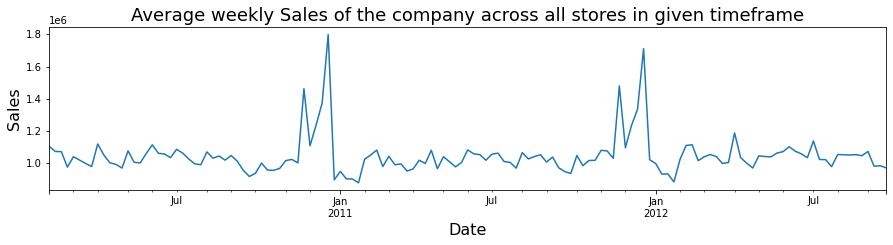

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,3))
train_df.groupby('Date')['Weekly_Sales'].mean().plot()
plt.title('Average weekly Sales of the company across all stores in given timeframe', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Date', fontsize=16);

In [ ]:
# 결측치 처리 전 'Promotion' plot
import matplotlib.pyplot as plt

for i,v in enumerate(['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']):
  plt.title(v)
  plt.hist(train_df[v])
  plt.tight_layout()
  plt.show()




In [ ]:
# Promotion변수의 결측치 처리
'''
train_df['Promotion1'].fillna(train_df['Promotion1'].mean(),inplace=True)
train_df['Promotion2'].fillna(train_df['Promotion2'].mean(),inplace=True)
train_df['Promotion3'].fillna(train_df['Promotion3'].mean(),inplace=True)
train_df['Promotion4'].fillna(train_df['Promotion4'].mean(),inplace=True)
train_df['Promotion5'].fillna(train_df['Promotion5'].mean(),inplace=True)

test_df['Promotion1'].fillna(test_df['Promotion1'].mean(),inplace=True)
test_df['Promotion2'].fillna(test_df['Promotion2'].mean(),inplace=True)
test_df['Promotion3'].fillna(test_df['Promotion3'].mean(),inplace=True)
test_df['Promotion4'].fillna(test_df['Promotion4'].mean(),inplace=True)
test_df['Promotion5'].fillna(test_df['Promotion5'].mean(),inplace=True)
'''
nan = ["Promotion1", "Promotion2", "Promotion3", "Promotion4", "Promotion5"] #어차피 nan값이 promotion밖에 없으므로 이 컬럼만 리스트로 할당

for i in range(1, 46):
    print("{}의 store의 nan 갯수".format(i))
    print(train_df[train_df.Store == i][nan].isna().sum(),"\n\n")

for i in range (1, 46):
    train_df.loc[:91+(139*(i-1)), nan] = 0


In [ ]:
from scipy import interpolate
train_df = train_df.fillna(method='bfill')
test_df = test_df.fillna(method='bfill')


In [ ]:
test_df.isnull().sum()

id              0
Store           0
Date            0
Temperature     0
Fuel_Price      0
Promotion1      0
Promotion2      0
Promotion3      0
Promotion4      0
Promotion5      0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import rc

train_df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,8.106,False,1643690.90
1,2,1,2010-02-12,38.51,2.548,0.0,0.0,0.0,0.0,0.0,8.106,True,1641957.44
2,3,1,2010-02-19,39.93,2.514,0.0,0.0,0.0,0.0,0.0,8.106,False,1611968.17
3,4,1,2010-02-26,46.63,2.561,0.0,0.0,0.0,0.0,0.0,8.106,False,1409727.59
4,5,1,2010-03-05,46.50,2.625,0.0,0.0,0.0,0.0,0.0,8.106,False,1554806.68


In [ ]:
# 결측치 처리 후 'Promotion' plot
import matplotlib.pyplot as plt
for i in ['Promotion1','Promotion2','Promotion3','Promotion4','Promotion5']:
  plt.title(i)
  plt.hist(train_df[i])
  plt.show()

In [ ]:
# Store 자료형 변환
train_df['Store'] = train_df['Store'].astype('object')
test_df['Store'] = test_df['Store'].astype('object')

In [ ]:
# 'Date'변수의 'Month'변수 생성

train_df['month'] = pd.DatetimeIndex(train_df['Date']).month
test_df['month'] = pd.DatetimeIndex(test_df['Date']).month


In [ ]:
train_df = train_df.replace({'IsHoliday' : True}, 1)
train_df = train_df.replace({'IsHoliday' : False}, 0)

test_df = test_df.replace({'IsHoliday' : True}, 1)
test_df = test_df.replace({'IsHoliday' : False}, 0)

In [ ]:
train_df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month
4726,4727,35,2010-02-05,27.19,2.784,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,9.262,0,1230613.50,2
3475,3476,26,2010-02-05,9.55,2.788,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.488,0,1034119.21,2
2641,2642,20,2010-02-05,25.92,2.784,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.187,0,2401395.47,2
1251,1252,10,2010-02-05,54.34,2.962,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,9.765,0,2193048.75,2
5977,5978,44,2010-02-05,31.53,2.666,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.119,0,281090.95,2


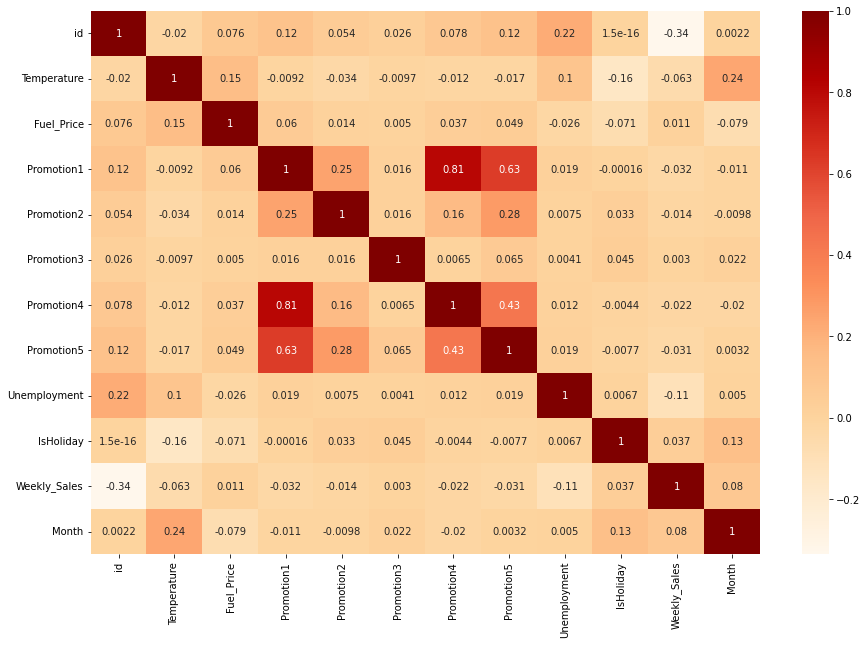

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(train_df.corr(),annot=True,cmap='OrRd');

In [ ]:
'''
# 'Store' 라벨 인코딩(선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 (트리 계열의 ML알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 괜찮음))
from sklearn.preprocessing import LabelEncoder
classle = LabelEncoder()

train_df['Store'] = classle.fit_transform(train_df['Store'].values)
'''
# 'Store' 원핫인코딩()
import pandas as pd
train_df = pd.get_dummies(train_df, columns = ['Store'])
test_df = pd.get_dummies(test_df, columns = ['Store'])
print(train_df.head())

   id       Date  Temperature  Fuel_Price  Promotion1  Promotion2  Promotion3  \
0   1 2010-02-05        42.31       2.572         0.0         0.0         0.0   
1   2 2010-02-12        38.51       2.548         0.0         0.0         0.0   
2   3 2010-02-19        39.93       2.514         0.0         0.0         0.0   
3   4 2010-02-26        46.63       2.561         0.0         0.0         0.0   
4   5 2010-03-05        46.50       2.625         0.0         0.0         0.0   

   Promotion4  Promotion5  Unemployment  ...  Store_36  Store_37  Store_38  \
0         0.0         0.0         8.106  ...         0         0         0   
1         0.0         0.0         8.106  ...         0         0         0   
2         0.0         0.0         8.106  ...         0         0         0   
3         0.0         0.0         8.106  ...         0         0         0   
4         0.0         0.0         8.106  ...         0         0         0   

   Store_39  Store_40  Store_41  Store_42  S

##이상치 처리

In [ ]:
# 이상치 제거 하면 'Store' 12, 28,38 사라짐
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
  quantile_25 = np.percentile(df[column].values, 25)
  quantile_75 = np.percentile(df[column].values, 75)

  IQR = quantile_75 - quantile_25
  IQR_weight = IQR*weight
  
  lowest = quantile_25 - IQR_weight
  highest = quantile_75 + IQR_weight
  
  outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
  return outlier_idx

# 함수 사용해서 이상치 값 삭제
#oulier_idx = get_outlier(df=train_df, column='Weekly_Sales', weight=1)
#train_df.drop(oulier_idx, axis=0, inplace=True)

#oulier_idx = get_outlier(df=train_df, column='Temperature', weight=1)
#train_df.drop(oulier_idx, axis=0, inplace=True)

#oulier_idx = get_outlier(df=train_df, column='Unemployment', weight=1)
#train_df.drop(oulier_idx, axis=0, inplace=True)

oulier_idx = get_outlier(df=train_df, column='Promotion1', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)

oulier_idx = get_outlier(df=train_df, column='Promotion2', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)
oulier_idx = get_outlier(df=train_df, column='Promotion3', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)
oulier_idx = get_outlier(df=train_df, column='Promotion4', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)
oulier_idx = get_outlier(df=train_df, column='Promotion5', weight=10)
train_df.drop(oulier_idx, axis=0, inplace=True)

In [ ]:
train_df.reset_index()

,index,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,month
0,0,1,1,2010-02-05,42.31,2.57,0.00,0.00,0.00,0.00,0.00,8.11,0,1643690.90,2
1,1,2,1,2010-02-12,38.51,2.55,0.00,0.00,0.00,0.00,0.00,8.11,1,1641957.44,2
2,2,3,1,2010-02-19,39.93,2.51,0.00,0.00,0.00,0.00,0.00,8.11,0,1611968.17,2
3,3,4,1,2010-02-26,46.63,2.56,0.00,0.00,0.00,0.00,0.00,8.11,0,1409727.59,2
4,4,5,1,2010-03-05,46.50,2.62,0.00,0.00,0.00,0.00,0.00,8.11,0,1554806.68,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6203,6203,6204,45,2011-10-07,55.82,3.58,0.00,0.00,0.00,0.00,0.00,8.52,0,753447.05,10
6204,6204,6205,45,2011-10-14,63.82,3.54,0.00,0.00,0.00,0.00,0.00,8.52,0,720946.99,10
6205,6205,6206,45,2011-10-21,59.60,3.57,0.00,0.00,0.00,0.00,0.00,8.52,0,771686.40,10
6206,6206,6207,45,2011-10-28,51.78,3.57,0.00,0.00,0.00,0.00,0.00,8.52,0,781694.57,10


In [ ]:
import pandas as pd
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
'''
def store(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]
    
    train = train.reset_index()
    train1 = train[train.month != 10]

    
    vali = train[train.month == 10]

    return train1, test, vali

def store2(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]

    train = train.reset_index()
    train1 = train[train.month != 10]
    
    vali = train[train.month == 10]

    return train1, test, vali
'''
def store(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]
    
    train = train.reset_index()
    train1 = train.iloc[100:]
    vali = train.iloc[88:91]

    return train1, test, vali

def store2(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]

    train = train.reset_index()
    train1 = train.iloc[100:]
    
    vali = train[train.month == 10]

    return train1, test, vali


def spl2(train, test, vali):
    xtrain = train[['Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday','month']]
    ytrain = train[["Weekly_Sales"]]
    xtest = test[['Temperature', 'Fuel_Price', 'Unemployment' ,'IsHoliday', 'month']]
    xvali = vali[['Temperature', 'Fuel_Price', 'Unemployment', 'IsHoliday','month']]
    yvali = vali[["Weekly_Sales"]]

    return xtrain, ytrain, xtest, xvali, yvali

def wjdrb(xtrain, xtest, xvali):
    scaler = MinMaxScaler()
    xtrain = pd.DataFrame(scaler.fit_transform(xtrain))
    xtest = pd.DataFrame(scaler.fit_transform(xtest))
    xvali = pd.DataFrame(scaler.fit_transform(xvali))
    return xtrain, xtest, xvali


def wjdrb2(xtrain, xtest, xvali):
    scaler = MinMaxScaler()
    xtrain = pd.DataFrame(scaler.fit_transform(xtrain))
    xtest = pd.DataFrame(scaler.fit_transform(xtest))
    xvali = pd.DataFrame(scaler.fit_transform(xvali))
    
    return xtrain, xtest, xvali

def model2(xtrain, ytrain, xtest):
    model = RandomForestRegressor()
    model.fit(xtrain,ytrain)
    pred = model.predict(xtest)
    
    return pred

def model(xtrain, ytrain, xtest, xvali, yvali):
    eval_set = [(xvali, yvali)]
    xgb_model = xgb.XGBRegressor(n_estimators=400, learning_rate=0.07, subsample=0.7,
                           colsample_bytree=0.7, max_depth=5, silent = 1, nthread = 4, min_child_weight = 4)
    
    xgb_model.fit(xtrain,ytrain, eval_set=eval_set, eval_metric="rmse", early_stopping_rounds=15)
    pred = xgb_model.predict(xtest)
    
    return pred

def spl(train, test, vali):
    xtrain = train[['Temperature', 'Fuel_Price','Promotion3', 'month']]
    ytrain = train[["Weekly_Sales"]]
    xvali = vali[['Temperature', 'Fuel_Price','Promotion3', 'month']]
    yvali = vali[["Weekly_Sales"]]
    xtest = test[['Temperature', 'Fuel_Price', 'Promotion3', 'month']]
    
    return xtrain, ytrain, xtest, xvali, yvali




In [ ]:
i=42
train1, test1, vali = store2(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
#train, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
predict = model2(xtrain, ytrain, xtest)

for i in predict:
  result.append(i)

In [ ]:
i=43
train1, test1, vali = store2(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
#xtrain, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
predict = model2(xtrain, ytrain, xtest)

for i in predict:
  result.append(i)

In [ ]:
i=44
train1, test1, vali = store2(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
#xtrain, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
predict = model2(xtrain, ytrain, xtest)

for i in predict:
  result.append(i)

In [ ]:
def store(train, test, i):
    train = train[train.Store == i]
    test = test[test.Store == i]
    
    train = train.reset_index()
    train1 = train[train.month != 10]

    
    vali = train[train.month == 10]

    return train1, test, vali

i=45
train1, test1, vali = store(train_df, test_df, i)
xtrain, ytrain, xtest, xvali, yvali = spl(train1, test1, vali)
#xtrain, xtest, xvali = wjdrb(xtrain, xtest, xvali)
predict = model(xtrain, ytrain, xtest, xvali, yvali)
for i in predict:
  result.append(i)




[0]	validation_0-rmse:685228
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:634691
[2]	validation_0-rmse:588702
[3]	validation_0-rmse:544155
[4]	validation_0-rmse:504648
[5]	validation_0-rmse:466695
[6]	validation_0-rmse:433430
[7]	validation_0-rmse:400640
[8]	validation_0-rmse:370016
[9]	validation_0-rmse:342765
[10]	validation_0-rmse:303378
[11]	validation_0-rmse:266692
[12]	validation_0-rmse:243632
[13]	validation_0-rmse:221827
[14]	validation_0-rmse:203044
[15]	validation_0-rmse:178004
[16]	validation_0-rmse:161333
[17]	validation_0-rmse:132951
[18]	validation_0-rmse:119309
[19]	validation_0-rmse:95966.3
[20]	validation_0-rmse:84579.9
[21]	validation_0-rmse:73800.6
[22]	validation_0-rmse:63967.3
[23]	validation_0-rmse:48347.3
[24]	validation_0-rmse:42237
[25]	validation_0-rmse:36324.1
[26]	validation_0-rmse:31843.5
[27]	validation_0-rmse:28338.4
[28]	validation_0-rmse:26122.8
[29]	validation_0-rmse:25557.8
[30]	validation_0-rmse:25645.3
[31]	

In [ ]:
train_df[train_df['Store']==45]

In [ ]:
for i in range(1,46):
  print(i)
  print(train_df[train_df['Store']==i].shape)
  print()

In [ ]:
print(len(result))

180


In [ ]:
# 42부터 에러
if __name__ == '__main__':
    
    result = []
    exc = [36, 38 , 42, 43, 44]    ## 비선형적인 지점들의 대한 리스트
    for i in range(1, 46):
      if i<42:   
          if i in exc:
              print(i)
              train1, test1, vali = store2(train_df, test_df, i)
              xtrain, ytrain, xtest, xvali, yvali = spl2(train1, test1, vali)
            # xtrain, xtest, xvali = wjdrb2(xtrain, xtest, xvali)
              predict = model2(xtrain, ytrain, xtest)

          else:
              print(i)
              train1, test1, vali = store(train_df, test_df, i)
              xtrain, ytrain, xtest, xvali, yvali = spl(train1, test1, vali)
              #xtrain, xtest, xvali = wjdrb(xtrain, xtest, xvali)
              predict = model(xtrain, ytrain, xtest, xvali, yvali)

          for i in predict:
              result.append(i)
      else:
        pass

1
[0]	validation_0-rmse:1.36368e+06
Will train until validation_0-rmse hasn't improved in 15 rounds.
[1]	validation_0-rmse:1.2635e+06
[2]	validation_0-rmse:1.17031e+06
[3]	validation_0-rmse:1.08348e+06
[4]	validation_0-rmse:1.00261e+06
[5]	validation_0-rmse:928047
[6]	validation_0-rmse:857188
[7]	validation_0-rmse:792514
[8]	validation_0-rmse:731128
[9]	validation_0-rmse:674435
[10]	validation_0-rmse:621783
[11]	validation_0-rmse:572773
[12]	validation_0-rmse:527333
[13]	validation_0-rmse:485246
[14]	validation_0-rmse:445879
[15]	validation_0-rmse:396145
[16]	validation_0-rmse:351289
[17]	validation_0-rmse:320658
[18]	validation_0-rmse:292605
[19]	validation_0-rmse:265367
[20]	validation_0-rmse:241986
[21]	validation_0-rmse:204188
[22]	validation_0-rmse:183753
[23]	validation_0-rmse:159053
[24]	validation_0-rmse:140223
[25]	validation_0-rmse:118240
[26]	validation_0-rmse:99069.7
[27]	validation_0-rmse:84819
[28]	validation_0-rmse:77716
[29]	validation_0-rmse:73742.3
[30]	validation_0-r

In [ ]:
col = ['Weekly_Sales']
df_result = pd.DataFrame(result, columns = col)
pd.options.display.float_format = '{:.2f}'.format
df_result


,Weekly_Sales
0,1485636.00
1,1492472.62
2,1485636.00
3,1485636.00
4,1786935.00
...,...
175,314330.78
176,745207.19
177,745207.19
178,745207.19


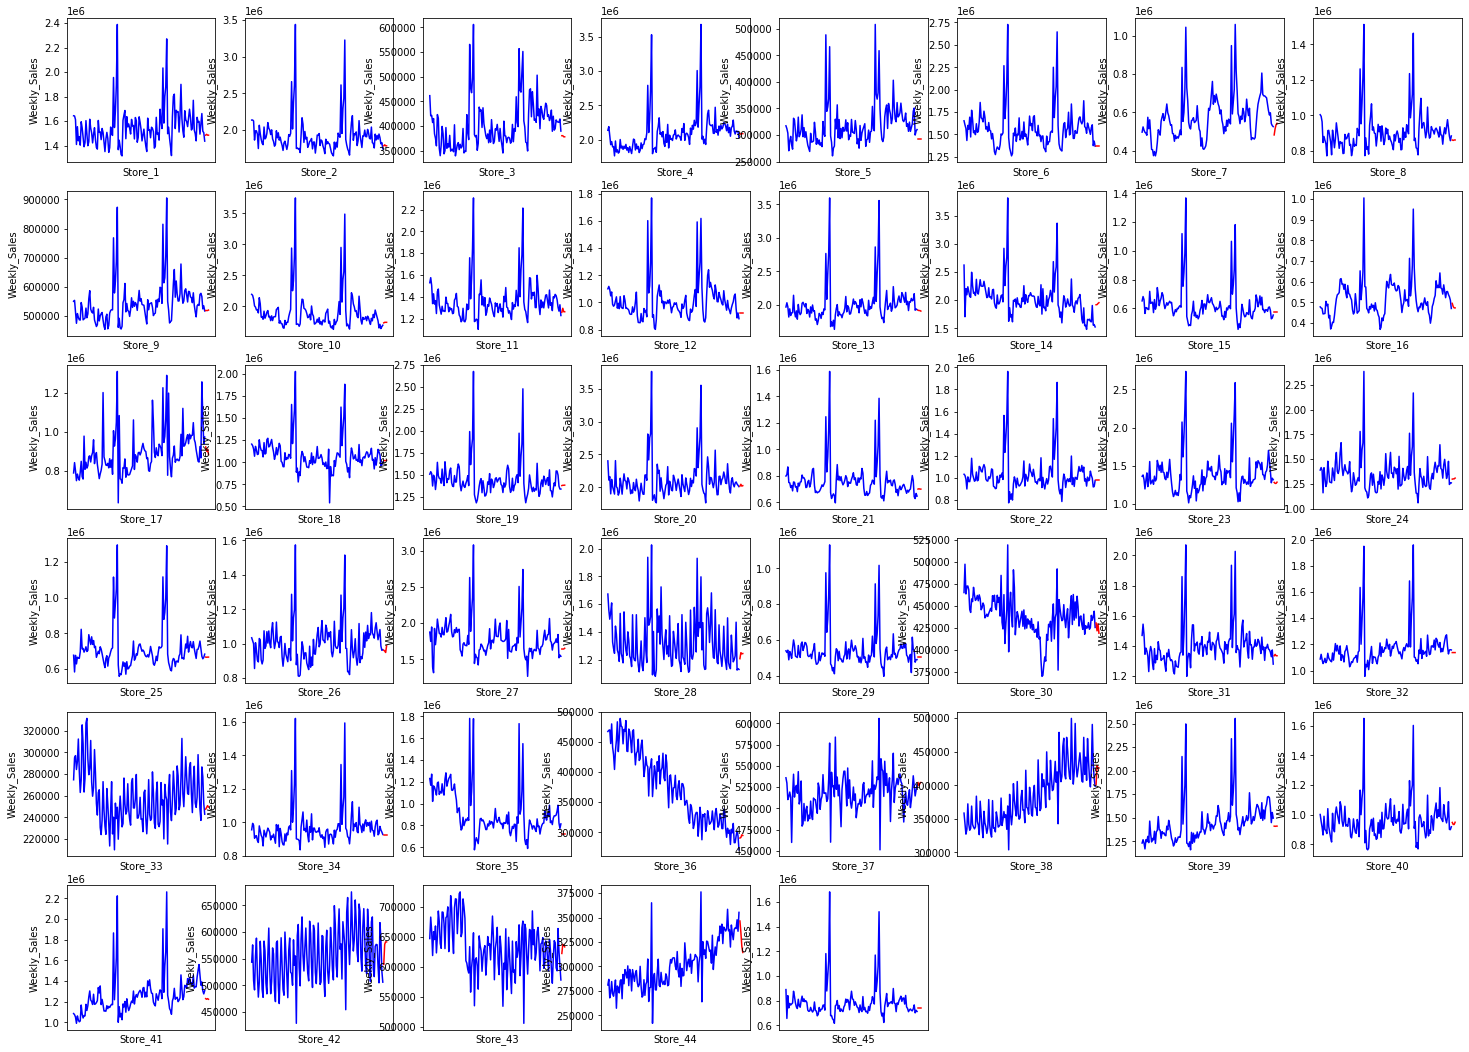

In [ ]:
# 추세 시각화

import pandas as pd
from matplotlib import dates

#Visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.palettes import color_palette

train = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/train.csv')
data = pd.read_csv('/content/drive/Shareddrives/2022통계학술제/data/test.csv')
data = pd.concat([data, df_result],axis=1)
fig = plt.figure(figsize=(25,25)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
exc = [36, 38 , 42, 43, 44]
#for i in exc:
for i in range(1,46):
    train2 = train[train.Store == i]
    data2 = data[data.Store == i]

    train2  = train2[["Date", "Weekly_Sales"]]
    test2 = data2[["Date", "Weekly_Sales"]]

    train2= train2.reset_index()
    #train2 = train2.iloc[100:]
    test2 = test2.reset_index()

    ax = fig.add_subplot(8,8,i) ## 그림 뼈대(프레임) 생성

    plt.xlabel("Store_{}".format(i)) 
    plt.ylabel('Weekly_Sales')
    plt.xticks(rotation=15)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval = 3))
    

    ax.plot(train2['Date'] ,train2["Weekly_Sales"],marker='',label='train', color="blue")
    ax.plot(test2['Date'], test2["Weekly_Sales"], label=test2, color="red") 
plt.show()


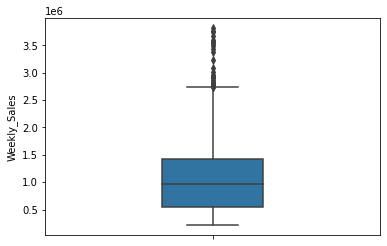

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=train_df,y="Weekly_Sales", width=0.3, color='tab:blue')
plt.show()




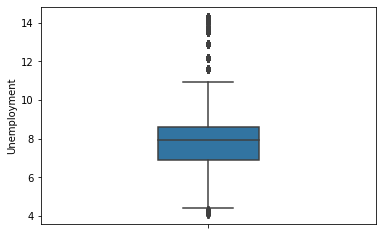

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Unemployment", width=0.3, color='tab:blue')
plt.show()

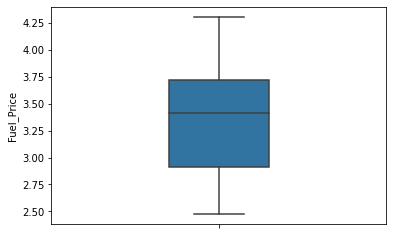

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Fuel_Price", width=0.3, color='tab:blue')
plt.show()

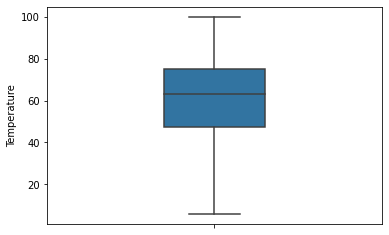

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Temperature", width=0.3, color='tab:blue')
plt.show()

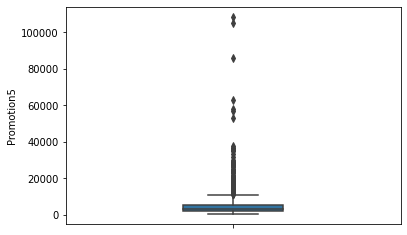

In [ ]:
import seaborn as sns
sns.boxplot(data=train_df,y="Promotion5", width=0.3, color='tab:blue')
plt.show()

#print(train_df[train_df['Promotion1']>=21000].count())

In [ ]:
train_df.info()

In [ ]:
#train_df['Month_NON'] = train_df['Month']

train_df['Month_NON'] = train_df['Month']
train_df['Month_11'] = train_df['Month']
train_df['Month_12'] = train_df['Month']


train_df.loc[(train_df.Month_NON <= 10 ),'Month_NON']=1
train_df.loc[(train_df.Month_NON == 11 ),'Month_NON']=0
train_df.loc[(train_df.Month_NON == 12 ),'Month_NON']=0


train_df.loc[(train_df.Month_11 <= 10 ),'Month_11']=0
train_df.loc[(train_df.Month_11 == 11 ),'Month_11']=1
train_df.loc[(train_df.Month_11 == 12 ),'Month_11']=0

train_df.loc[(train_df.Month_12 <= 10 ),'Month_12']=0
train_df.loc[(train_df.Month_12 == 11 ),'Month_12']=0
train_df.loc[(train_df.Month_12 == 12 ),'Month_12']=1



test_df['Month_NON'] = test_df['Month']
test_df['Month_11'] = test_df['Month']
test_df['Month_12'] = test_df['Month']


test_df.loc[(test_df.Month_NON <= 10 ),'Month_NON']=1
test_df.loc[(test_df.Month_NON == 11 ),'Month_NON']=0
test_df.loc[(test_df.Month_NON == 12 ),'Month_NON']=0


test_df.loc[(test_df.Month_11 <= 10 ),'Month_11']=0
test_df.loc[(test_df.Month_11 == 11 ),'Month_11']=1
test_df.loc[(test_df.Month_11 == 12 ),'Month_11']=0

test_df.loc[(test_df.Month_12 <= 10 ),'Month_12']=0
test_df.loc[(test_df.Month_12 == 11 ),'Month_12']=0
test_df.loc[(test_df.Month_12 == 12 ),'Month_12']=1



In [ ]:
#train_df.groupby('Store')['Weekly_Sales'].mean()
train_df.head()

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales,Month,Month_NON,Month_11,Month_12
0,1,1,2010-02-05,42.31,2.572,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1643690.90,2,1,0,0
1,2,1,2010-02-12,38.51,2.548,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,1,1641957.44,2,1,0,0
2,3,1,2010-02-19,39.93,2.514,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1611968.17,2,1,0,0
3,4,1,2010-02-26,46.63,2.561,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1409727.59,2,1,0,0
4,5,1,2010-03-05,46.50,2.625,7155.930661,3308.12581,1462.535523,3465.952501,4518.993173,8.106,0,1554806.68,3,1,0,0
